El código resuelve un sistema de ecuaciones lineales homogéneas 2x2 de la forma:

$$ \frac{dx_1}{dt}= ax_1 + bx_2 $$


$$ \frac{dx_2}{dt}= cx_1 + dx_2 $$

reescrito de la forma:

$$ X' = AX $$

Donde: 
\begin{align}
\boldsymbol{X}=\begin{bmatrix}
x_1\\
x_2\\
\end{bmatrix}
\end{align}
 

\begin{align}
\boldsymbol{A}=\begin{bmatrix}
a & b\\
c & d\\
\end{bmatrix}
\end{align}
Con condiciones iniciales:
$$ x_1(t_1) = x_1 $$
$$ x_2(t_2) = x_2 $$

La entrada consta de la matriz A escrita en dos arreglos:

$$ a,b $$
$$ c,d $$

y las condiciones iniciales escritas en dos arreglos:

$$t_1,t_2$$
$$x_1,x_2$$


Recordar que existen 3 tipos de soluciones dependiendo de los autovalores de A:

i) Autovalores reales distintos:

Real.png

ii) Autovalores repetidos:

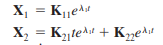

iii) Autovalores complejos:

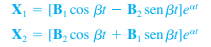

Para obtener soluciones de la forma i) se puede usar la matriz:

\begin{align}
\boldsymbol{A}=\begin{bmatrix}
2 & 3\\
2 & 1\\
\end{bmatrix}
\end{align}

Para obtener soluciones de la forma ii) se puede usar la matriz:

\begin{align}
\boldsymbol{A}=\begin{bmatrix}
3 & -18\\
2 & -9\\
\end{bmatrix}
\end{align}

Para obtener soluciones de la forma iii) se puede usar la matriz:

\begin{align}
\boldsymbol{A}=\begin{bmatrix}
6 & -1\\
5 & 4\\
\end{bmatrix}
\end{align}

In [64]:
import numpy as np
import sympy as sp

x=sp.Function('x')
y=sp.Function('y')
t=sp.Symbol('t')
e=sp.Symbol('e')
cos=sp.Function('cos')
sin=sp.Function('sin')

def rep(x):
    lista=[]
    for i in range(len(x)-1,-1,-1):
        for j in range(len(x)-1,-1,-1):
            if i!=j:
                if x[i]==x[j] and j not in lista:
                    lista.append(j)
    for i in lista:
        for j in lista:
            if x[i]==x[j]:
                lista.remove(j)
    return lista

Up=[]
for i in range(0,2):
    print("Escriba los coeficientes de la fila "+str(i+1)+" separados por comas: dx"+str(i+1)+"/dt = a0,a1,...,an-1")
    xip=input()
    xip=xip.split(",")
    for j in range(0,len(xip)):
        xip[j]=float(xip[j])
    Up.append(xip)
Up=np.array(Up)
print('La matriz del sistema es:')
id=np.identity(2)
Z=sp.Matrix(Up)
Z

Escriba los coeficientes de la fila 1 separados por comas: dx1/dt = a0,a1,...,an-1
6,-1
Escriba los coeficientes de la fila 2 separados por comas: dx2/dt = a0,a1,...,an-1
5,4
La matriz del sistema es:


Matrix([
[6.0, -1.0],
[5.0,  4.0]])

In [65]:
print("Ecriba las condiciones iniciales en la variable independiente separadas por coma: t01,t02")
xip=input()
xip=xip.split(",")
for j in range(0,len(xip)):
    xip[j]=float(xip[j])
Xo=np.array(xip)

print("Ecriba las condiciones iniciales en la variable dependiente separadas por coma: x1(t01),x2(t02)")
yip=input()
yip=yip.split(",")
for j in range(0,len(yip)):
    yip[j]=float(yip[j])
Yo=np.array(yip)
v,V=np.linalg.eig(Up)
Ec=Up-id*v[0].real
M=[]
av=rep(v.real)
for j in range(2):
    res=np.array([])
    if isinstance(v[j],complex) and abs(v[j].imag)>=1e-6:
        a=round(v[0].real,5)
        b=abs(v[0].imag)
        A=V[:,0].real
        B=V[:,0].imag
        to=Xo[j]
        res=np.append(res,(A[j]*np.cos(b*to)-B[j]*np.sin(b*to))*np.exp(a*to))
        res=np.append(res,(B[j]*np.cos(b*to)+A[j]*np.sin(b*to))*np.exp(a*to))
    else:
        for i in range(2):
            if i in av and all(np.round(V[:,i-1].real,9)==np.round(V[:,i].real,9)):
                Ec=Up-id*v[j]
                try:
                    P=np.linalg.solve(Ec.real, np.round(V[:,j].real,9))
                except:
                    p2=0
                    p1=V[:,j][0]/Ec[0][0]
                    P=np.array([p1,p2]).real
                
                to=Xo[j]
                res=np.append(res,P[j]*np.exp(v[i]*to)*to+V[:,i][j]*np.exp(v[i]*to))
            else:
                to=Xo[j]
                res=np.append(res,V[:,i][j]*np.exp(v[i]*to))
    M.append(res)
        
M=np.array(M)
M=M.real
C=np.linalg.solve(M, Yo)

sol=[]
print("La solución general es:")
for j in range(2):
    res=0
    if isinstance(v[j],complex) and abs(v[j].imag)>=1e-5:
            res+=(round(C[0]*A[j],10)*cos(b*t)-round(C[0]*B[j],10)*sin(b*t))*e**(a*t)
            res+=(round(C[1]*B[j],10)*cos(b*t)+round(C[1]*A[j],10)*sin(b*t))*e**(a*t)
    else:
        for i in range(2):
            if i in av and all(np.round(V[:,i-1].real,9)==np.round(V[:,i].real,9)):
                res+=round(C[i]*P[j].real,10)*t*e**(v[i].real*t)+round(C[i]*V[:,i][j].real,10)*e**(v[i].real*t)
            else:
                res+=round(C[i]*V[:,i][j].real,10)*e**(v[i].real*t)
    sol.append(res)
for i in range(len(sol)):
    print("x"+str(i+1)+"=")
    print(sol[i])

Ecriba las condiciones iniciales en la variable independiente separadas por coma: t01,t02
1,1
Ecriba las condiciones iniciales en la variable dependiente separadas por coma: x1(t01),x2(t02)
1,1
La solución general es:
x1=
e**(5.0*t)*(0.0001037694*sin(2.0*t) + 0.0002075389*cos(2.0*t)) + e**(5.0*t)*(0.0060230284*sin(2.0*t) - 0.0030115142*cos(2.0*t))
x2=
0.0005188472*e**(5.0*t)*sin(2.0*t) - 0.0150575711*e**(5.0*t)*cos(2.0*t)


In [66]:
print("x1=")
sol[0]

x1=


e**(5.0*t)*(0.0001037694*sin(2.0*t) + 0.0002075389*cos(2.0*t)) + e**(5.0*t)*(0.0060230284*sin(2.0*t) - 0.0030115142*cos(2.0*t))

In [67]:
print("x2=")
sol[1]

x2=


0.0005188472*e**(5.0*t)*sin(2.0*t) - 0.0150575711*e**(5.0*t)*cos(2.0*t)